<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Part-2" data-toc-modified-id="Part-2-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Part 2</a></span><ul class="toc-item"><li><span><a href="#Linear-Classifier" data-toc-modified-id="Linear-Classifier-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Linear Classifier</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Question-3:-10-fold-cross-validation" data-toc-modified-id="Question-3:-10-fold-cross-validation-1.1.0.1"><span class="toc-item-num">1.1.0.1&nbsp;&nbsp;</span>Question 3: 10-fold cross validation</a></span></li><li><span><a href="#Generating-models-and-measuring-performances" data-toc-modified-id="Generating-models-and-measuring-performances-1.1.0.2"><span class="toc-item-num">1.1.0.2&nbsp;&nbsp;</span>Generating models and measuring performances</a></span></li><li><span><a href="#Bar-Charts-of-metrics-(Precision,-Recall,-F1-score)" data-toc-modified-id="Bar-Charts-of-metrics-(Precision,-Recall,-F1-score)-1.1.0.3"><span class="toc-item-num">1.1.0.3&nbsp;&nbsp;</span>Bar Charts of metrics (Precision, Recall, F1-score)</a></span></li><li><span><a href="#ROC-Curve-for-every-model-using-out-of-folds-samples" data-toc-modified-id="ROC-Curve-for-every-model-using-out-of-folds-samples-1.1.0.4"><span class="toc-item-num">1.1.0.4&nbsp;&nbsp;</span>ROC Curve for every model using out-of-folds samples</a></span></li><li><span><a href="#Question-5:-3000-test-samples" data-toc-modified-id="Question-5:-3000-test-samples-1.1.0.5"><span class="toc-item-num">1.1.0.5&nbsp;&nbsp;</span>Question 5: 3000 test samples</a></span></li><li><span><a href="#Bar-Charts-of-metrics-(Precision,-Recall,-F1-score)" data-toc-modified-id="Bar-Charts-of-metrics-(Precision,-Recall,-F1-score)-1.1.0.6"><span class="toc-item-num">1.1.0.6&nbsp;&nbsp;</span>Bar Charts of metrics (Precision, Recall, F1-score)</a></span></li><li><span><a href="#ROC-Curve-for-every-model-using-out-of-folds-samples" data-toc-modified-id="ROC-Curve-for-every-model-using-out-of-folds-samples-1.1.0.7"><span class="toc-item-num">1.1.0.7&nbsp;&nbsp;</span>ROC Curve for every model using out-of-folds samples</a></span></li><li><span><a href="#Question-5:-4000-test-samples" data-toc-modified-id="Question-5:-4000-test-samples-1.1.0.8"><span class="toc-item-num">1.1.0.8&nbsp;&nbsp;</span>Question 5: 4000 test samples</a></span></li><li><span><a href="#Bar-Charts-of-metrics-(Precision,-Recall,-F1-score)" data-toc-modified-id="Bar-Charts-of-metrics-(Precision,-Recall,-F1-score)-1.1.0.9"><span class="toc-item-num">1.1.0.9&nbsp;&nbsp;</span>Bar Charts of metrics (Precision, Recall, F1-score)</a></span></li><li><span><a href="#ROC-Curve-for-every-model-using-out-of-folds-samples" data-toc-modified-id="ROC-Curve-for-every-model-using-out-of-folds-samples-1.1.0.10"><span class="toc-item-num">1.1.0.10&nbsp;&nbsp;</span>ROC Curve for every model using out-of-folds samples</a></span></li><li><span><a href="#Question-5:-9000-test-samples" data-toc-modified-id="Question-5:-9000-test-samples-1.1.0.11"><span class="toc-item-num">1.1.0.11&nbsp;&nbsp;</span>Question 5: 9000 test samples</a></span></li><li><span><a href="#Bar-Charts-of-metrics-(Precision,-Recall,-F1-score)" data-toc-modified-id="Bar-Charts-of-metrics-(Precision,-Recall,-F1-score)-1.1.0.12"><span class="toc-item-num">1.1.0.12&nbsp;&nbsp;</span>Bar Charts of metrics (Precision, Recall, F1-score)</a></span></li><li><span><a href="#ROC-Curve-for-every-model-using-out-of-folds-samples" data-toc-modified-id="ROC-Curve-for-every-model-using-out-of-folds-samples-1.1.0.13"><span class="toc-item-num">1.1.0.13&nbsp;&nbsp;</span>ROC Curve for every model using out-of-folds samples</a></span></li></ul></li></ul></li></ul></li></ul></div>

In [2]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np
import sklearn.preprocessing
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense# Neural network
from keras.layers import Activation
from keras.layers import Dropout

from tqdm import tqdm

Using TensorFlow backend.


In [3]:
# CONSTANTS
BASE_FILE_PATH = "/content/drive/My Drive/HW/DMML/CW/Dataset"
Y_TRAIN_ONE_VS_ALL_BASENAME =  "y_train_smpl_{}.csv"
SEED = 42
TEST_SIZE = 0.33
NUM_CLASSES = 10
DISCRETIZATION_BINS_NUMBER = 10
NUM_OF_FIELDS_TO_KEEP = 10
NUM_FIELDS = 10
NUM_FOLDS = 10
NUM_OF_TENS_OF_FIELDS_TO_TRAIN = 200
IMAGE_SHAPE = (48, 48)
CLASSES = {
    0: "speed_limit_60",
    1: "speed_limit_80",
    2: "speed_limit_80_lifted",
    3: "right of way at crossing",
    4: "right of way in general",
    5: "give way",
    6: "stop",
    7: "no speed limit general",
    8: "turn right down",
    9: "turn left down"
}

In [4]:
data = pd.read_csv("x_train_gr_smpl.csv")
ground_truth = pd.read_csv("y_train_smpl.csv")
ground_truth.columns=["prediction"]
df = pd.concat([data, ground_truth], axis=1)
X, y = data, ground_truth

In [5]:
Y_ONE_VS_ALL = {
    
}
# loading all one_vs_rest ground-truth
for i in CLASSES.keys():
    tmp_gt = pd.read_csv(Y_TRAIN_ONE_VS_ALL_BASENAME.format(i))
    Y_ONE_VS_ALL[i] = tmp_gt

# Part 2
## Linear Classifier

#### Question 3: 10-fold cross validation

Using the provided training data sets, and the 10-fold cross validation, run the classifier, and note its accuracy for varying learning parameters provided by Weka (or your other tool of choice). Record all your findings and explain them. Make sure you understand and can explainlogically the meaningof the confusion matrix, as well as the information containedin the “Detailed Accuracy” field: TP Rate, FP Rate, Precision, Recall, F Measure, ROC Area.

In [6]:
Linear_models = {
    "LinearDiscriminantAnalysis": {
        "base_class": LinearDiscriminantAnalysis,
        "models":[],
        "out_of_folds_prediction":{ # in this field, we concatenate all the test instances and results from the 10 folds
            "x":[],
            "y_pred":[],
            "y_true":[],
            "scores":[] # this contains the probabilities associated to the real class of the test instances
          }
    }, # J48 is also known as C4.5 but scikit-learn only implements the CART algorithm, an evolution of the C4.5
    "LogisticRegression": {
        "base_class": LogisticRegression,
        "models":[],
        "out_of_folds_prediction":{
            "x":[],
            "y_pred":[],
            "y_true":[],
            "scores":[]
        }
    }
}

#### Generating models and measuring performances

In [7]:
# matrix of stats where each line is one training run on a given model
# The measures are precision, recall, f1-score, support. We will make one bar chart per measure
# columns are : fold_number, measure_name, measure_val, model, class
stats_1 = []

skf_1  = StratifiedKFold(n_splits=NUM_FOLDS, shuffle=True, random_state=SEED)

In [8]:
for i, (train_idx, test_idx) in enumerate(skf_1.split(X, y)):

    n_img_train = len(train_idx)
    
    print("Running Fold", i+1, "/", NUM_FOLDS, "on ",n_img_train, " images")

    splitted_X_train = X.iloc[train_idx, :]
    splitted_y_train = y.iloc[train_idx, :]

    splitted_X_test = X.iloc[test_idx, :]
    splitted_y_test = y.iloc[test_idx, :]
    
    # looping over every model, training them and storing their trained model in an array
    for model_key in Linear_models.keys():
        print("\tTraining model ", model_key)

        # initiate an instance of the model class
        model = Linear_models[model_key]["base_class"]()

        Linear_models[model_key]["models"].append(model.fit(splitted_X_train, np.ravel(splitted_y_train)))
        
        print("\tTesting model  ", model_key)
        predicted_test = model.predict(splitted_X_test)
        probas = model.predict_proba(splitted_X_test)
        acc = metrics.accuracy_score(splitted_y_test, predicted_test)
        print("\t\t acc:", acc)
        #probas_of_actual_class = [probas[idx] for probas,idx in zip(probas,np.ravel(splitted_y_test).T)]
        
        Linear_models[model_key]["out_of_folds_prediction"]["x"].extend(splitted_X_test)
        Linear_models[model_key]["out_of_folds_prediction"]["y_true"].extend(splitted_y_test.to_numpy().T.flatten())
        Linear_models[model_key]["out_of_folds_prediction"]["y_pred"].extend(predicted_test)
        Linear_models[model_key]["out_of_folds_prediction"]["scores"].extend(probas)
        
        # print test results
        report = metrics.classification_report(splitted_y_test, predicted_test, output_dict=True)
        # keys of report are the labels (i.e the 10 panel classes here)
        # {'label 1': {'precision':0.5,
        #      'recall':1.0,
        #      'f1-score':0.67,
        #      'support':1},
        # 'label 2': { ... },
        #   ...
        # }
        # keys of the report are : ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'accuracy', 'macro avg', 'weighted avg']
        # we want to only loop over the class keys
        for class_key in list(report.keys())[:len(CLASSES.keys())]:
          for measure_key in report[class_key].keys():
            # supports simply gives the number of samples from the class in question
            if (measure_key != "support"):
              # columns are : fold_number, measure_name, measure_val, model_name, class
              #print(report[class_key][measure_key], type(report[class_key][measure_key]), report[class_key])
              stats_1.append(
                  [i, measure_key, float(report[class_key][measure_key]), model_key, class_key]
              )

    
    print('-----------------------\n-----------------------')

Running Fold 1 / 10 on  11394  images
	Training model  LinearDiscriminantAnalysis
	Testing model   LinearDiscriminantAnalysis
		 acc: 0.8672985781990521
	Training model  LogisticRegression


C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


	Testing model   LogisticRegression
		 acc: 0.9360189573459715
-----------------------
-----------------------
Running Fold 2 / 10 on  11394  images
	Training model  LinearDiscriminantAnalysis
	Testing model   LinearDiscriminantAnalysis
		 acc: 0.8799368088467614
	Training model  LogisticRegression


C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


	Testing model   LogisticRegression
		 acc: 0.9470774091627172
-----------------------
-----------------------
Running Fold 3 / 10 on  11394  images
	Training model  LinearDiscriminantAnalysis
	Testing model   LinearDiscriminantAnalysis
		 acc: 0.8562401263823065
	Training model  LogisticRegression


C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


	Testing model   LogisticRegression
		 acc: 0.9257503949447078
-----------------------
-----------------------
Running Fold 4 / 10 on  11394  images
	Training model  LinearDiscriminantAnalysis
	Testing model   LinearDiscriminantAnalysis
		 acc: 0.868088467614534
	Training model  LogisticRegression


C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


	Testing model   LogisticRegression
		 acc: 0.9478672985781991
-----------------------
-----------------------
Running Fold 5 / 10 on  11394  images
	Training model  LinearDiscriminantAnalysis
	Testing model   LinearDiscriminantAnalysis
		 acc: 0.8467614533965245
	Training model  LogisticRegression


C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


	Testing model   LogisticRegression
		 acc: 0.919431279620853
-----------------------
-----------------------
Running Fold 6 / 10 on  11394  images
	Training model  LinearDiscriminantAnalysis
	Testing model   LinearDiscriminantAnalysis
		 acc: 0.8609794628751974
	Training model  LogisticRegression


C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


	Testing model   LogisticRegression
		 acc: 0.9249605055292259
-----------------------
-----------------------
Running Fold 7 / 10 on  11394  images
	Training model  LinearDiscriminantAnalysis
	Testing model   LinearDiscriminantAnalysis
		 acc: 0.8562401263823065
	Training model  LogisticRegression


C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


	Testing model   LogisticRegression
		 acc: 0.9360189573459715
-----------------------
-----------------------
Running Fold 8 / 10 on  11394  images
	Training model  LinearDiscriminantAnalysis
	Testing model   LinearDiscriminantAnalysis
		 acc: 0.8712480252764613
	Training model  LogisticRegression


C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


	Testing model   LogisticRegression
		 acc: 0.9368088467614534
-----------------------
-----------------------
Running Fold 9 / 10 on  11394  images
	Training model  LinearDiscriminantAnalysis
	Testing model   LinearDiscriminantAnalysis
		 acc: 0.8775671406003159
	Training model  LogisticRegression


C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


	Testing model   LogisticRegression
		 acc: 0.9502369668246445
-----------------------
-----------------------
Running Fold 10 / 10 on  11394  images
	Training model  LinearDiscriminantAnalysis
	Testing model   LinearDiscriminantAnalysis
		 acc: 0.8704581358609794
	Training model  LogisticRegression


C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


	Testing model   LogisticRegression
		 acc: 0.9352290679304898
-----------------------
-----------------------


#### Bar Charts of metrics (Precision, Recall, F1-score)

Now that we have trained our models, we will be able to print a bar charts for each measure (hence 3 plots). In the x-axis, we will put the class+model, and on the y-axis the performance for the given measure.

Text(0.5, 1.0, 'Precision measure')

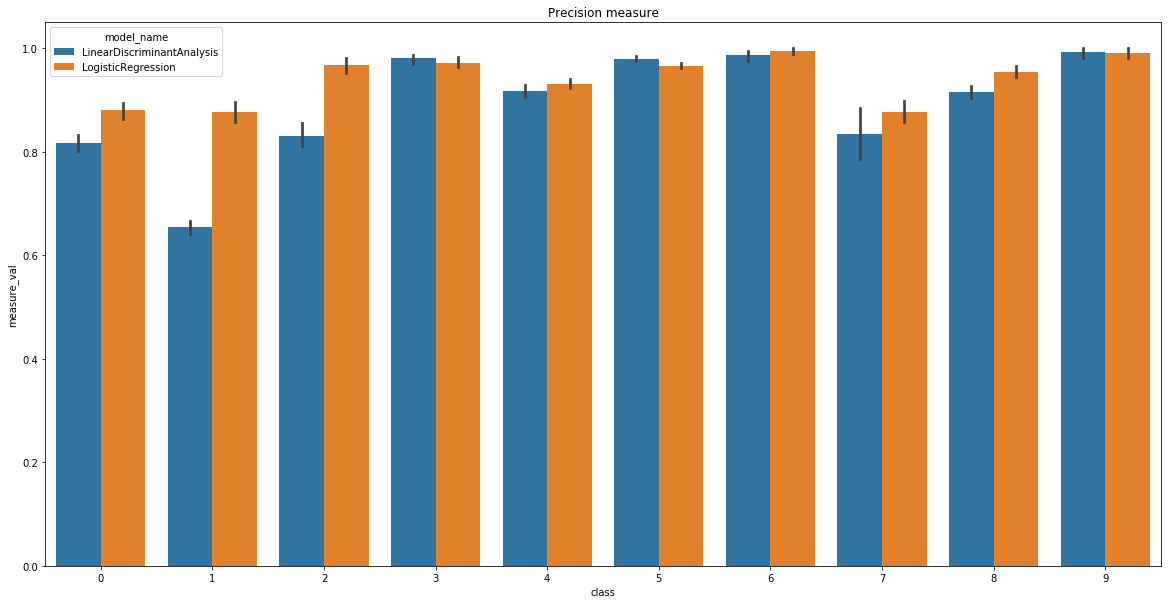

In [9]:
df = pd.DataFrame(np.array(stats_1))

df.columns = ["fold_number", "measure_name", "measure_val", "model_name", "class"]

df["measure_val"] = pd.to_numeric(df.measure_val, errors='coerce')

plt.figure(figsize=(20, 10))
ax = sns.barplot(x="class", y="measure_val", hue="model_name", data=df[df["measure_name"] == "precision"])
ax.set_title("Precision measure")

Text(0.5, 1.0, 'Recall measure')

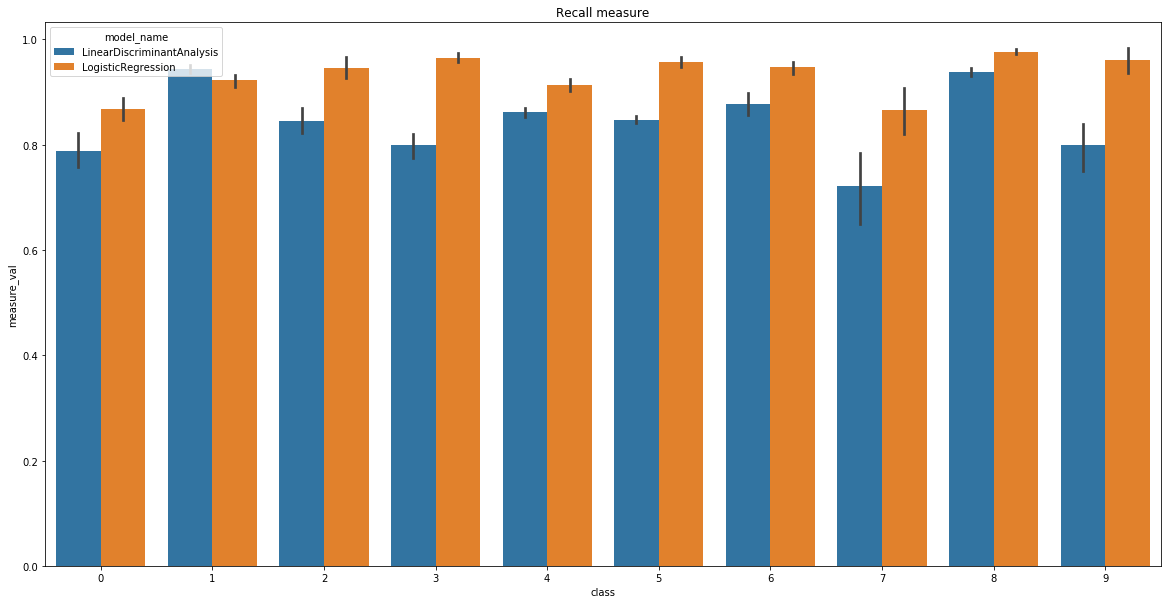

In [10]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="class", y="measure_val", hue="model_name", data=df[df["measure_name"] == "recall"])
ax.set_title("Recall measure")

Text(0.5, 1.0, 'F1 score measure')

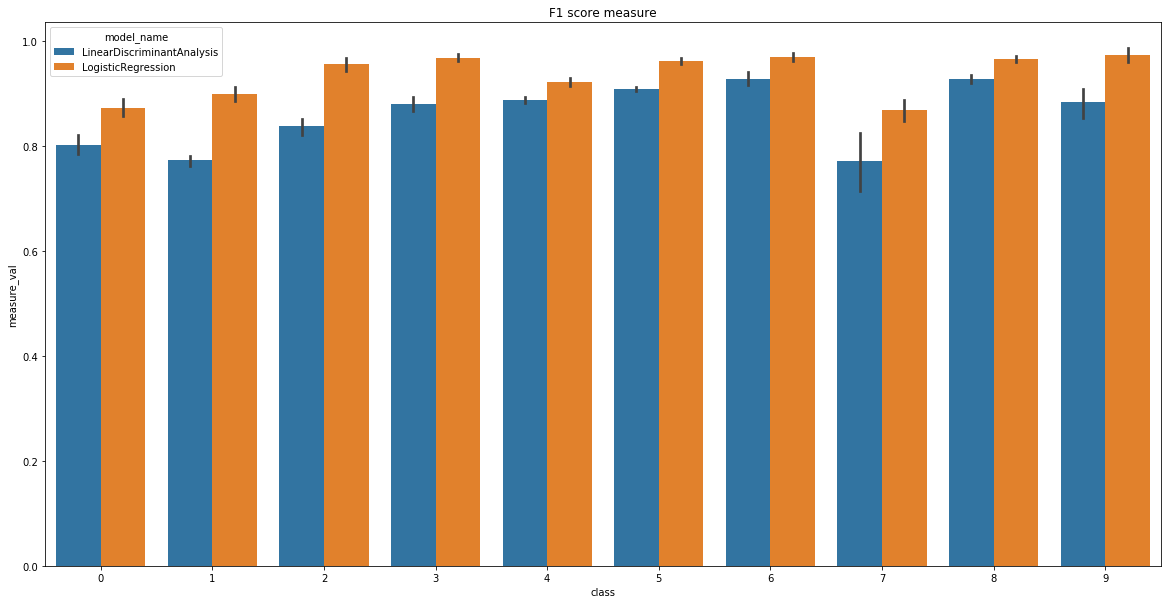

In [11]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="class", y="measure_val", hue="model_name", data=df[df["measure_name"] == "f1-score"])
ax.set_title("F1 score measure")

#### ROC Curve for every model using out-of-folds samples

Using the out-of-folds prediction we collected earlier, we will plot the ROC Curve.

In [12]:
def plot_roc_curve(fpr, tpr, roc_auc, ax, class_number):
  lw = 2
  ax.plot(fpr, tpr, color='darkorange',
          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
  ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
  ax.set_title(f'ROC of class {class_number}')
  ax.legend(loc="lower right")


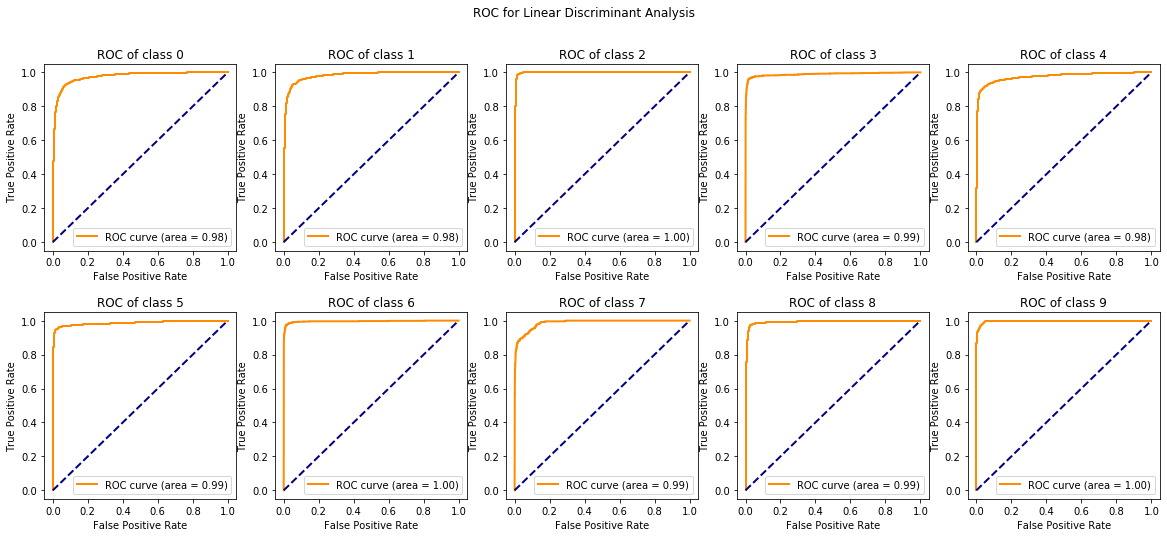

In [13]:
scores = np.array(Linear_models["LinearDiscriminantAnalysis"]["out_of_folds_prediction"]["scores"])
y_bin = sklearn.preprocessing.label_binarize(Linear_models["LinearDiscriminantAnalysis"]["out_of_folds_prediction"]["y_true"], classes=list(CLASSES.keys()))

fig, axs = plt.subplots(nrows=2, ncols=5)
fig.set_size_inches(20, 8)
fig.suptitle("ROC for Linear Discriminant Analysis")
fig.subplots_adjust(hspace=0.33)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(list(CLASSES.keys()))):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_bin[:, i], scores[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    plot_roc_curve(fpr[i], tpr[i], roc_auc[i], axs[int(i/5), i%5], i)

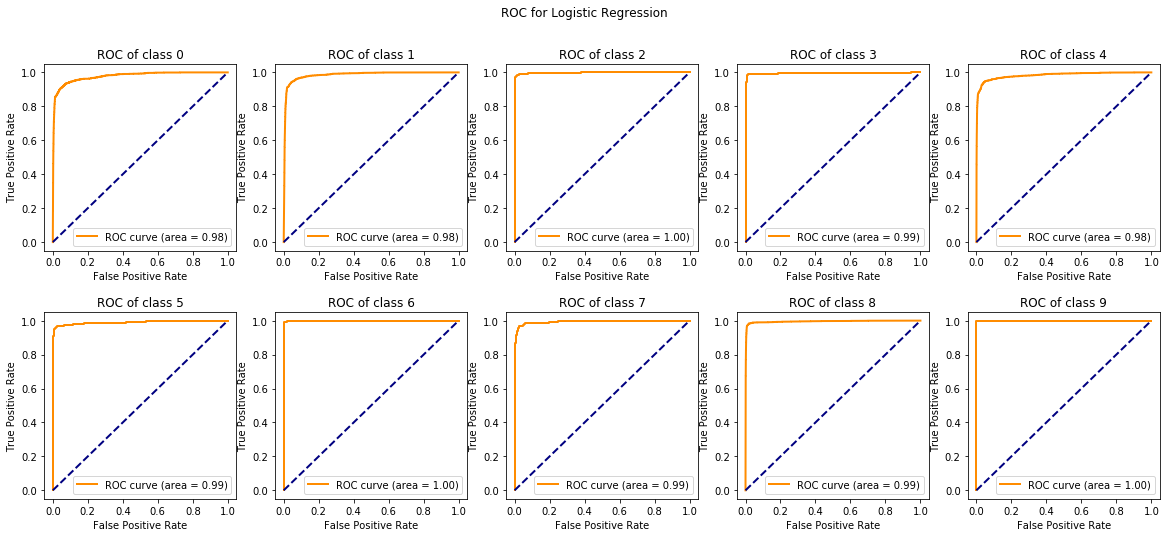

In [14]:
scores = np.array(Linear_models["LogisticRegression"]["out_of_folds_prediction"]["scores"])
y_bin = sklearn.preprocessing.label_binarize(Linear_models["LogisticRegression"]["out_of_folds_prediction"]["y_true"], classes=list(CLASSES.keys()))

fig, axs = plt.subplots(nrows=2, ncols=5)
fig.set_size_inches(20, 8)
fig.suptitle("ROC for Logistic Regression")
fig.subplots_adjust(hspace=0.33)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(list(CLASSES.keys()))):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_bin[:, i], scores[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    plot_roc_curve(fpr[i], tpr[i], roc_auc[i], axs[int(i/5), i%5], i)


#### Question 5: 3000 test samples

Repeat steps 3 and 4, this time using training and testing data sets instead of the cross validation. That is, build the classifier using the training data set, and test the classifier using the test data set. Note the accuracy.

In [23]:
linear_models_train_test_split = {

        "LinearDiscriminantAnalysis": {
        "base_class": LinearDiscriminantAnalysis,
        "models": None,
        "scores":[] # this contains the probabilities associated to the real class of the test instances
          
    }, # J48 is also known as C4.5 but scikit-learn only implements the CART algorithm, an evolution of the C4.5
    "LogisticRegression": {
        "base_class": LogisticRegression,
        "models": None,
        "scores":[]
        
    }
}


# matrix of stats where each line is one training run on a given model
# The measures are precision, recall, f1-score, support. We will make one bar chart per measure
# columns are : measure_name, measure_val, model, class
linear_3000_stats_train_test = []

X_train_linear_3000, X_test_linear_3000, y_train_linear_3000, y_test_linear_3000 = train_test_split(X, y, test_size=3000, random_state=SEED)
  
# looping over every model, training them and storing their trained model in an array
for model_key in linear_models_train_test_split.keys():
    print("\tTraining model ", model_key)


    # initiate an instance of the model class
    model = linear_models_train_test_split[model_key]["base_class"]()

    linear_models_train_test_split[model_key]["models"] = model.fit(X_train_linear_3000, np.ravel(y_train_linear_3000))
    #linear_models_train_test_split[model_key]["models"].append(model.fit(X_train_linear_3000, np.ravel(y_train_linear_3000)))
    
    print("\tTesting model  ", model_key)
    predicted_test = model.predict(X_test_linear_3000)
    probas = model.predict_proba(X_test_linear_3000)
    acc = metrics.accuracy_score(y_test_linear_3000, predicted_test)
    print("\t\t acc:", acc)
    #probas_of_actual_class = [probas[idx] for probas,idx in zip(probas,np.ravel(splitted_y_test).T)]
    
    linear_models_train_test_split[model_key]["scores"].extend(probas)
    
    # print test results
    report = metrics.classification_report(y_test_linear_3000, predicted_test, output_dict=True)
    # keys of report are the labels (i.e the 10 panel classes here)
    # {'label 1': {'precision':0.5,
    #      'recall':1.0,
    #      'f1-score':0.67,
    #      'support':1},
    # 'label 2': { ... },
    #   ...
    # }
    # keys of the report are : ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'accuracy', 'macro avg', 'weighted avg']
    # we want to only loop over the class keys
    for class_key in list(report.keys())[:len(CLASSES.keys())]:
              for measure_key in report[class_key].keys():
                # supports simply gives the number of samples from the class in question
                if (measure_key != "support"):
                  # columns are : fold_number, measure_name, measure_val, model_name, class
                  #print(report[class_key][measure_key], type(report[class_key][measure_key]), report[class_key])
                  linear_3000_stats_train_test.append(
                      [i, measure_key, float(report[class_key][measure_key]), model_key, class_key]
                  )


    print('-----------------------\n-----------------------')


	Training model  LinearDiscriminantAnalysis
	Testing model   LinearDiscriminantAnalysis
		 acc: 0.8603333333333333
-----------------------
-----------------------
	Training model  LogisticRegression


C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


	Testing model   LogisticRegression
		 acc: 0.9363333333333334
-----------------------
-----------------------


#### Bar Charts of metrics (Precision, Recall, F1-score)

Now that we have trained our models, we will be able to print a bar charts for each measure (hence 3 plots). In the x-axis, we will put the class+model, and on the y-axis the performance for the given measure.

Text(0.5, 1.0, 'Precision measure')

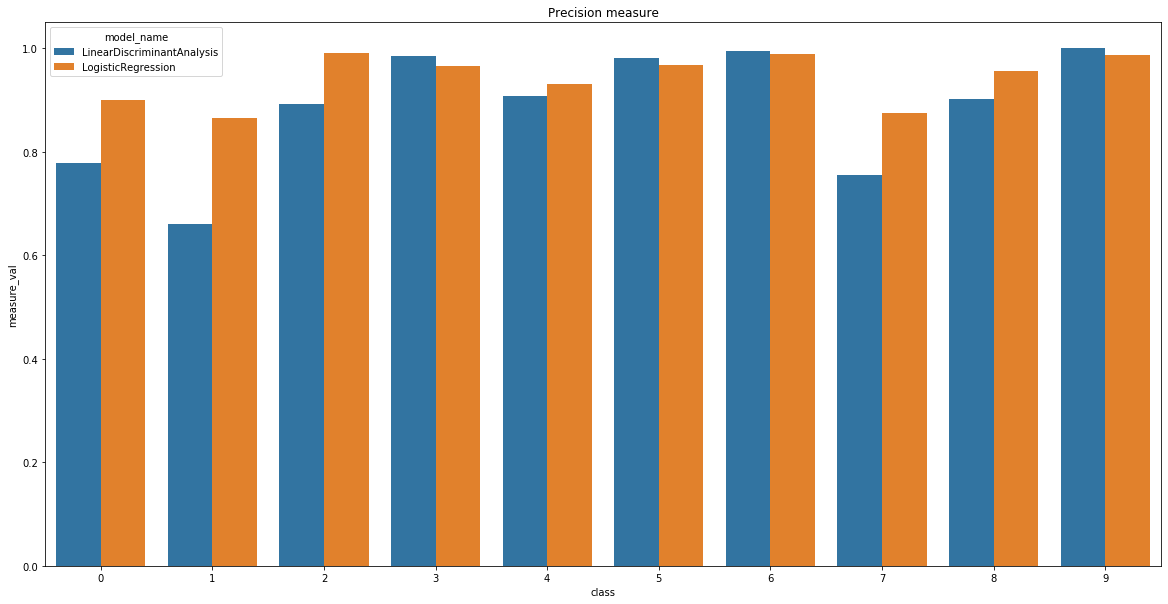

In [27]:
df = pd.DataFrame(np.array(linear_3000_stats_train_test))
#print(df)
df.columns = ["_","measure_name", "measure_val", "model_name", "class"]

df["measure_val"] = pd.to_numeric(df.measure_val, errors='coerce')

plt.figure(figsize=(20, 10))
ax = sns.barplot(x="class", y="measure_val", hue="model_name", data=df[df["measure_name"] == "precision"])
ax.set_title("Precision measure")

Text(0.5, 1.0, 'Recall measure')

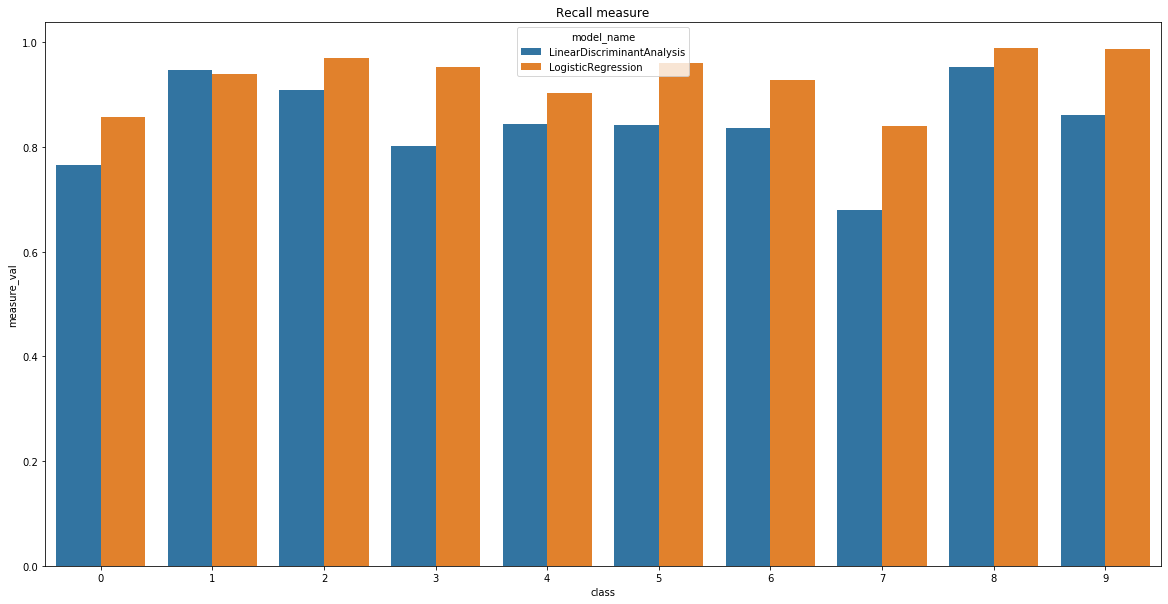

In [28]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="class", y="measure_val", hue="model_name", data=df[df["measure_name"] == "recall"])
ax.set_title("Recall measure")

Text(0.5, 1.0, 'F1 score measure')

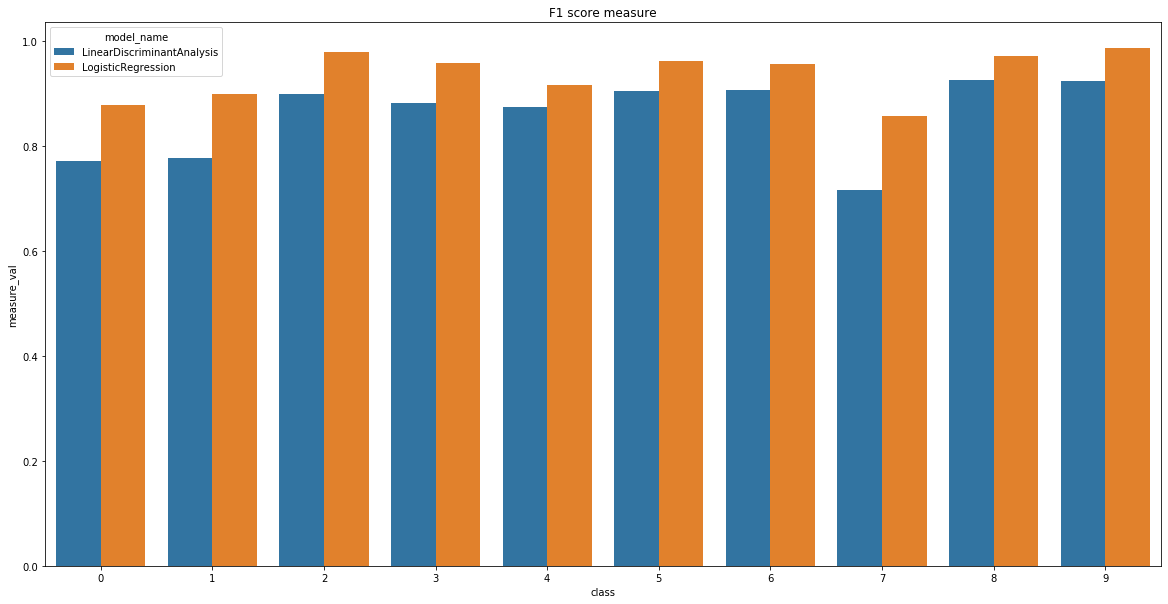

In [29]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="class", y="measure_val", hue="model_name", data=df[df["measure_name"] == "f1-score"])
ax.set_title("F1 score measure")

#### ROC Curve for every model using out-of-folds samples

Using the out-of-folds prediction we collected earlier, we will plot the ROC Curve.

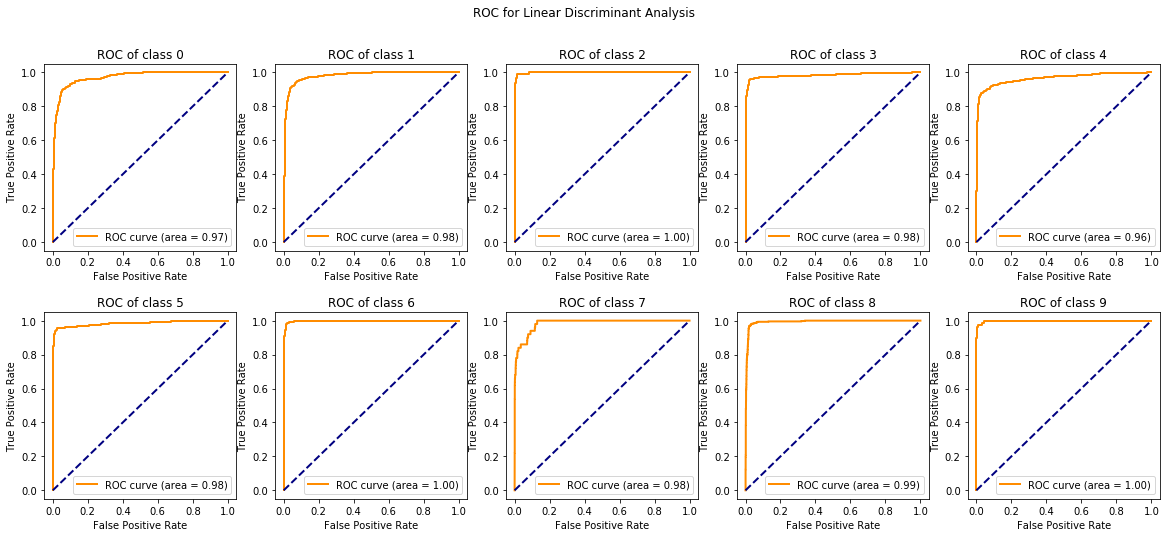

In [30]:
scores = np.array(linear_models_train_test_split["LinearDiscriminantAnalysis"]["scores"])
y_bin = sklearn.preprocessing.label_binarize(y_test_linear_3000, classes=list(CLASSES.keys()))
#X_train_linear_3000, X_test_linear_3000, y_train_linear_3000, y_test_linear_3000
fig, axs = plt.subplots(nrows=2, ncols=5)
fig.set_size_inches(20, 8)
fig.suptitle("ROC for Linear Discriminant Analysis")
fig.subplots_adjust(hspace=0.33)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(list(CLASSES.keys()))):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_bin[:, i], scores[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    plot_roc_curve(fpr[i], tpr[i], roc_auc[i], axs[int(i/5), i%5], i)

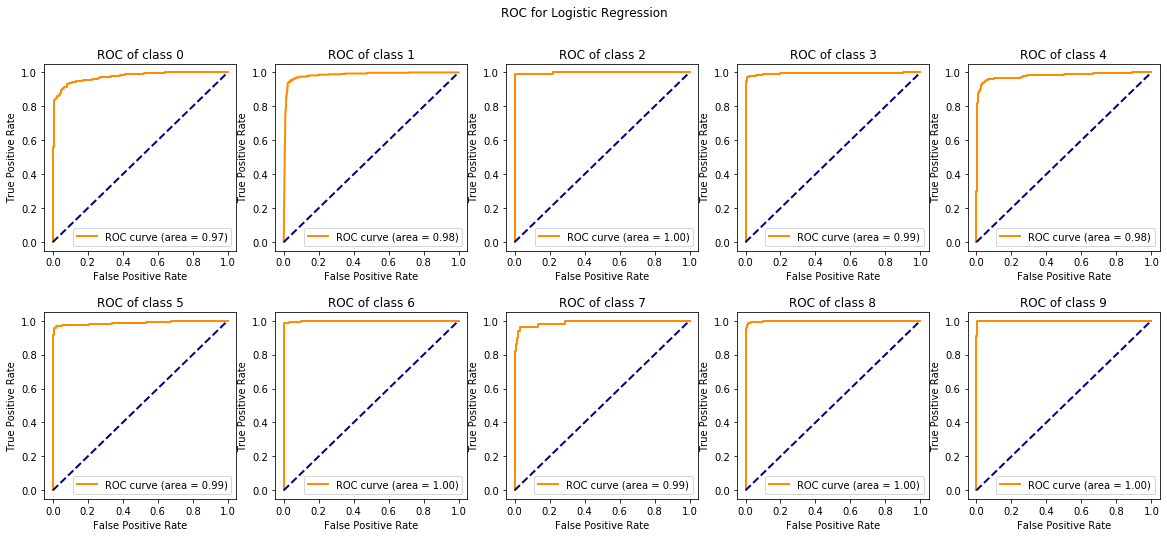

In [31]:
scores = np.array(linear_models_train_test_split["LogisticRegression"]["scores"])
y_bin = sklearn.preprocessing.label_binarize(y_test_linear_3000, classes=list(CLASSES.keys()))

fig, axs = plt.subplots(nrows=2, ncols=5)
fig.set_size_inches(20, 8)
fig.suptitle("ROC for Logistic Regression")
fig.subplots_adjust(hspace=0.33)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(list(CLASSES.keys()))):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_bin[:, i], scores[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    plot_roc_curve(fpr[i], tpr[i], roc_auc[i], axs[int(i/5), i%5], i)



#### Question 5: 4000 test samples

Repeat steps 3 and 4, this time using training and testing data sets instead of the cross validation. That is, build the classifier using the training data set, and test the classifier using the test data set. Note the accuracy.

In [49]:
linear_models_train_test_split_4k = {

        "LinearDiscriminantAnalysis": {
        "base_class": LinearDiscriminantAnalysis,
        "models": None,
        "scores":[] # this contains the probabilities associated to the real class of the test instances
          
    }, # J48 is also known as C4.5 but scikit-learn only implements the CART algorithm, an evolution of the C4.5
    "LogisticRegression": {
        "base_class": LogisticRegression,
        "models": None,
        "scores":[]
        
    }
}


# matrix of stats where each line is one training run on a given model
# The measures are precision, recall, f1-score, support. We will make one bar chart per measure
# columns are : measure_name, measure_val, model, class
linear_4000_stats_train_test = []

X_train_linear_4000, X_test_linear_4000, y_train_linear_4000, y_test_linear_4000 = train_test_split(X, y, test_size=4000, random_state=SEED)
  
# looping over every model, training them and storing their trained model in an array
for model_key in linear_models_train_test_split_4k.keys():
    print("\tTraining model ", model_key)


    # initiate an instance of the model class
    model = linear_models_train_test_split_4k[model_key]["base_class"]()

    linear_models_train_test_split_4k[model_key]["models"] = model.fit(X_train_linear_4000, np.ravel(y_train_linear_4000))
    
    print("\tTesting model  ", model_key)
    predicted_test = model.predict(X_test_linear_4000)
    probas = model.predict_proba(X_test_linear_4000)
    acc = metrics.accuracy_score(y_test_linear_4000, predicted_test)
    print("\t\t acc:", acc)
    #probas_of_actual_class = [probas[idx] for probas,idx in zip(probas,np.ravel(splitted_y_test).T)]
    
    linear_models_train_test_split_4k[model_key]["scores"].extend(probas)
    
    # print test results
    report = metrics.classification_report(y_test_linear_4000, predicted_test, output_dict=True)
    # keys of report are the labels (i.e the 10 panel classes here)
    # {'label 1': {'precision':0.5,
    #      'recall':1.0,
    #      'f1-score':0.67,
    #      'support':1},
    # 'label 2': { ... },
    #   ...
    # }
    # keys of the report are : ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'accuracy', 'macro avg', 'weighted avg']
    # we want to only loop over the class keys
    for class_key in list(report.keys())[:len(CLASSES.keys())]:
              for measure_key in report[class_key].keys():
                # supports simply gives the number of samples from the class in question
                if (measure_key != "support"):
                  # columns are : fold_number, measure_name, measure_val, model_name, class
                  #print(report[class_key][measure_key], type(report[class_key][measure_key]), report[class_key])
                  linear_4000_stats_train_test.append(
                      [i, measure_key, float(report[class_key][measure_key]), model_key, class_key]
                  )


    print('-----------------------\n-----------------------')


	Training model  LinearDiscriminantAnalysis
	Testing model   LinearDiscriminantAnalysis
		 acc: 0.85
-----------------------
-----------------------
	Training model  LogisticRegression


C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


	Testing model   LogisticRegression
		 acc: 0.93175
-----------------------
-----------------------


#### Bar Charts of metrics (Precision, Recall, F1-score)

Now that we have trained our models, we will be able to print a bar charts for each measure (hence 3 plots). In the x-axis, we will put the class+model, and on the y-axis the performance for the given measure.

Text(0.5, 1.0, 'Precision measure')

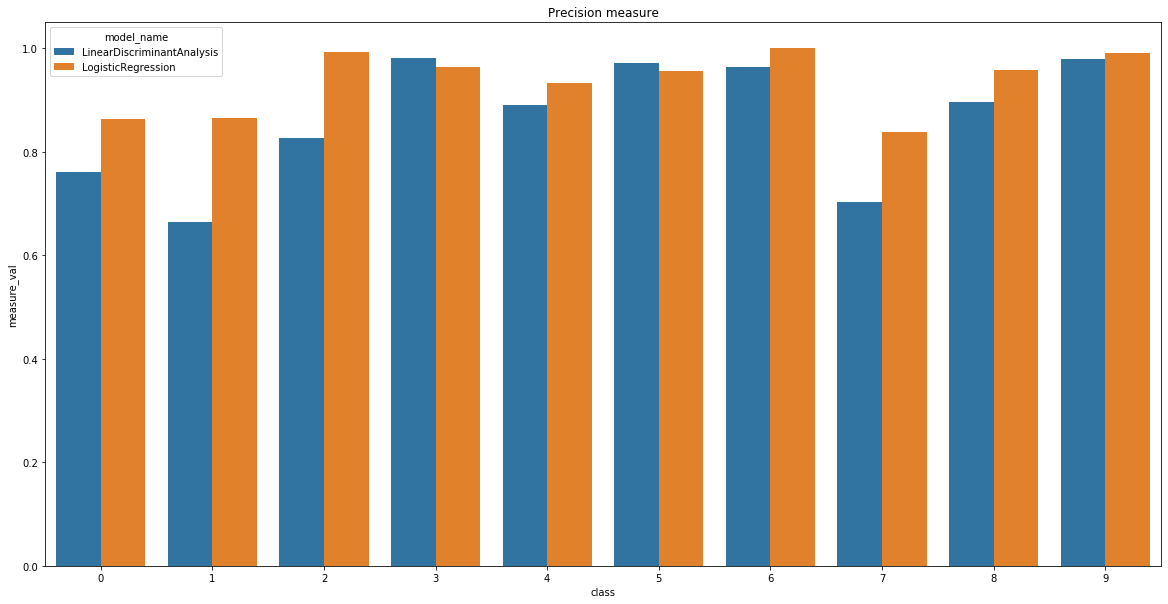

In [50]:
df = pd.DataFrame(np.array(linear_4000_stats_train_test))

df.columns = ["_","measure_name", "measure_val", "model_name", "class"]

df["measure_val"] = pd.to_numeric(df.measure_val, errors='coerce')

plt.figure(figsize=(20, 10))
ax = sns.barplot(x="class", y="measure_val", hue="model_name", data=df[df["measure_name"] == "precision"])
ax.set_title("Precision measure")

Text(0.5, 1.0, 'Recall measure')

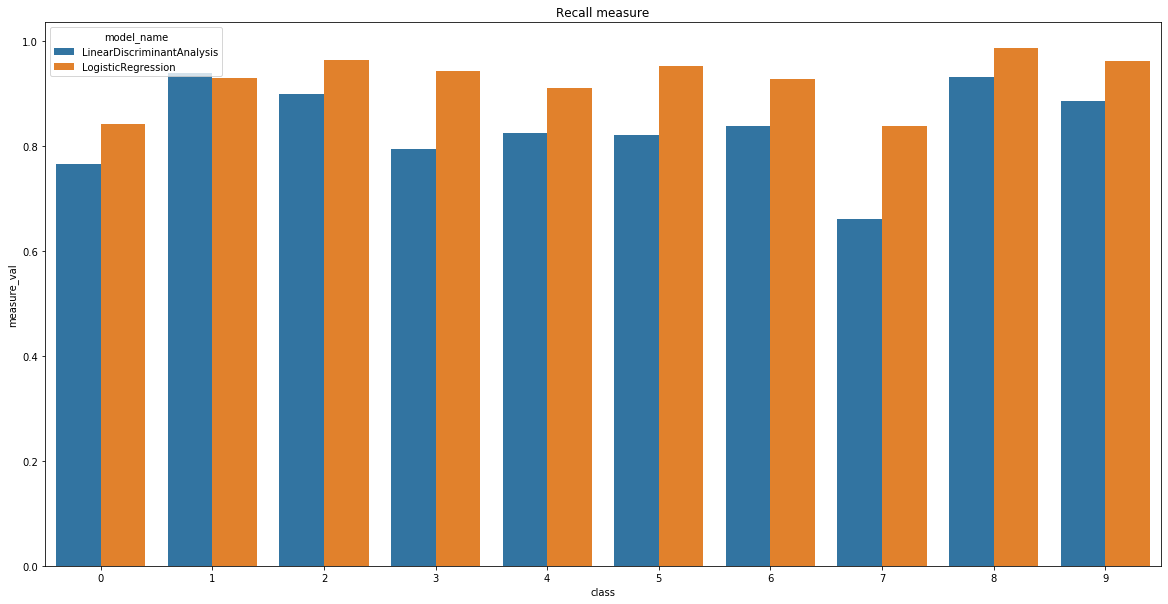

In [51]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="class", y="measure_val", hue="model_name", data=df[df["measure_name"] == "recall"])
ax.set_title("Recall measure")

Text(0.5, 1.0, 'F1 score measure')

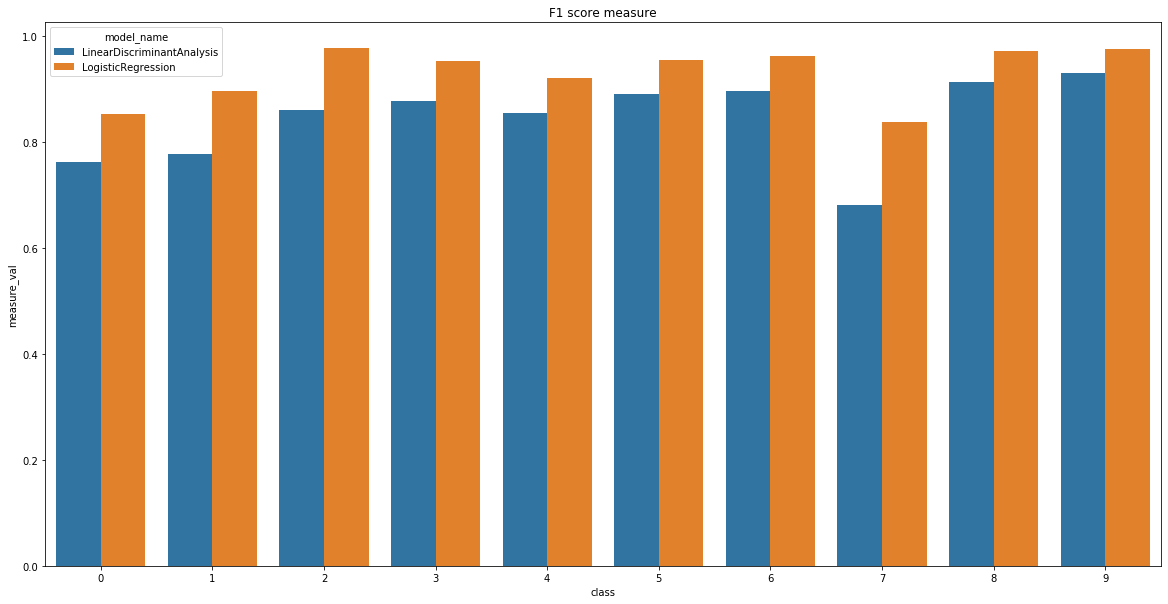

In [52]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="class", y="measure_val", hue="model_name", data=df[df["measure_name"] == "f1-score"])
ax.set_title("F1 score measure")

#### ROC Curve for every model using out-of-folds samples

Using the out-of-folds prediction we collected earlier, we will plot the ROC Curve.

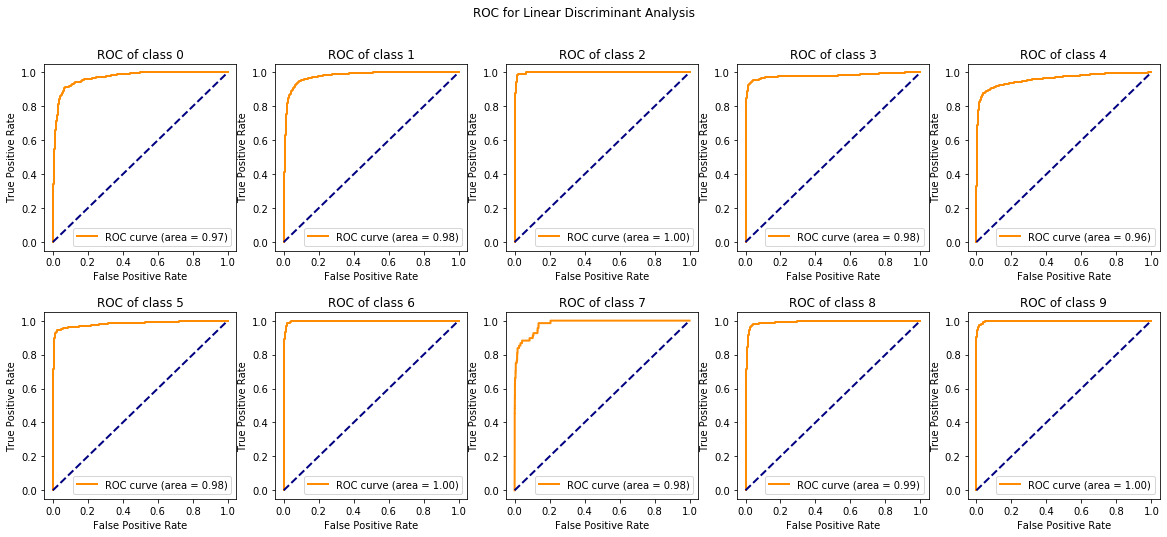

In [53]:
scores = np.array(linear_models_train_test_split_4k["LinearDiscriminantAnalysis"]["scores"])
y_bin = sklearn.preprocessing.label_binarize(y_test_linear_4000, classes=list(CLASSES.keys()))

fig, axs = plt.subplots(nrows=2, ncols=5)
fig.set_size_inches(20, 8)
fig.suptitle("ROC for Linear Discriminant Analysis")
fig.subplots_adjust(hspace=0.33)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(list(CLASSES.keys()))):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_bin[:, i], scores[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    plot_roc_curve(fpr[i], tpr[i], roc_auc[i], axs[int(i/5), i%5], i)

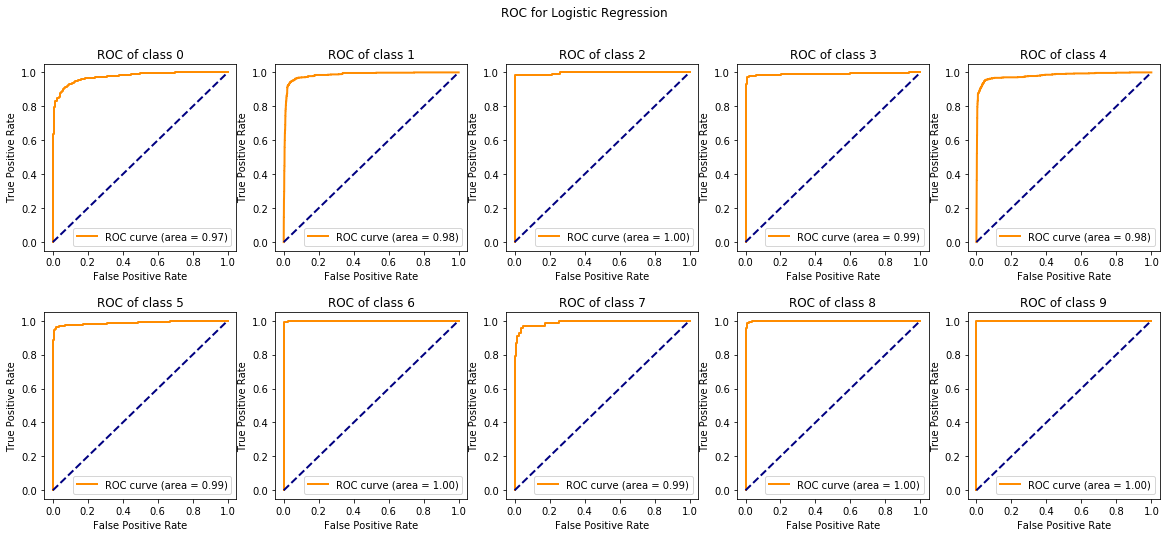

In [54]:
scores = np.array(linear_models_train_test_split_4k["LogisticRegression"]["scores"])
y_bin = sklearn.preprocessing.label_binarize(y_test_linear_4000, classes=list(CLASSES.keys()))

fig, axs = plt.subplots(nrows=2, ncols=5)
fig.set_size_inches(20, 8)
fig.suptitle("ROC for Logistic Regression")
fig.subplots_adjust(hspace=0.33)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(list(CLASSES.keys()))):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_bin[:, i], scores[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    plot_roc_curve(fpr[i], tpr[i], roc_auc[i], axs[int(i/5), i%5], i)


#### Question 5: 9000 test samples

Repeat steps 3 and 4, this time using training and testing data sets instead of the cross validation. That is, build the classifier using the training data set, and test the classifier using the test data set. Note the accuracy.

In [55]:
linear_models_train_test_split_9k = {

        "LinearDiscriminantAnalysis": {
        "base_class": LinearDiscriminantAnalysis,
        "models": None,
        "scores":[] # this contains the probabilities associated to the real class of the test instances
          
    }, # J48 is also known as C4.5 but scikit-learn only implements the CART algorithm, an evolution of the C4.5
    "LogisticRegression": {
        "base_class": LogisticRegression,
        "models": None,
        "scores":[]
        
    }
}


# matrix of stats where each line is one training run on a given model
# The measures are precision, recall, f1-score, support. We will make one bar chart per measure
# columns are : measure_name, measure_val, model, class
linear_9000_stats_train_test = []

X_train_linear_9000, X_test_linear_9000, y_train_linear_9000, y_test_linear_9000 = train_test_split(X, y, test_size=9000, random_state=SEED)
  
# looping over every model, training them and storing their trained model in an array
for model_key in linear_models_train_test_split_9k.keys():
    print("\tTraining model ", model_key)


    # initiate an instance of the model class
    model = linear_models_train_test_split_9k[model_key]["base_class"]()

    linear_models_train_test_split_9k[model_key]["models"] = model.fit(X_train_linear_9000, np.ravel(y_train_linear_9000))
    
    print("\tTesting model  ", model_key)
    predicted_test = model.predict(X_test_linear_9000)
    probas = model.predict_proba(X_test_linear_9000)
    acc = metrics.accuracy_score(y_test_linear_9000, predicted_test)
    
    print("\t\t acc:", acc)
    #probas_of_actual_class = [probas[idx] for probas,idx in zip(probas,np.ravel(splitted_y_test).T)]
    
    linear_models_train_test_split_9k[model_key]["scores"].extend(probas)
    
    # print test results
    report = metrics.classification_report(y_test_linear_9000, predicted_test, output_dict=True)
    # keys of report are the labels (i.e the 10 panel classes here)
    # {'label 1': {'precision':0.5,
    #      'recall':1.0,
    #      'f1-score':0.67,
    #      'support':1},
    # 'label 2': { ... },
    #   ...
    # }
    # keys of the report are : ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'accuracy', 'macro avg', 'weighted avg']
    # we want to only loop over the class keys
    for class_key in list(report.keys())[:len(CLASSES.keys())]:
              for measure_key in report[class_key].keys():
                # supports simply gives the number of samples from the class in question
                if (measure_key != "support"):
                  # columns are : fold_number, measure_name, measure_val, model_name, class
                  #print(report[class_key][measure_key], type(report[class_key][measure_key]), report[class_key])
                  linear_9000_stats_train_test.append(
                      [i, measure_key, float(report[class_key][measure_key]), model_key, class_key]
                  )

    print('-----------------------\n-----------------------')


	Training model  LinearDiscriminantAnalysis
	Testing model   LinearDiscriminantAnalysis
		 acc: 0.6607777777777778
-----------------------
-----------------------
	Training model  LogisticRegression


C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\dacca\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


	Testing model   LogisticRegression
		 acc: 0.9167777777777778
-----------------------
-----------------------


#### Bar Charts of metrics (Precision, Recall, F1-score)

Now that we have trained our models, we will be able to print a bar charts for each measure (hence 3 plots). In the x-axis, we will put the class+model, and on the y-axis the performance for the given measure.

Text(0.5, 1.0, 'Precision measure')

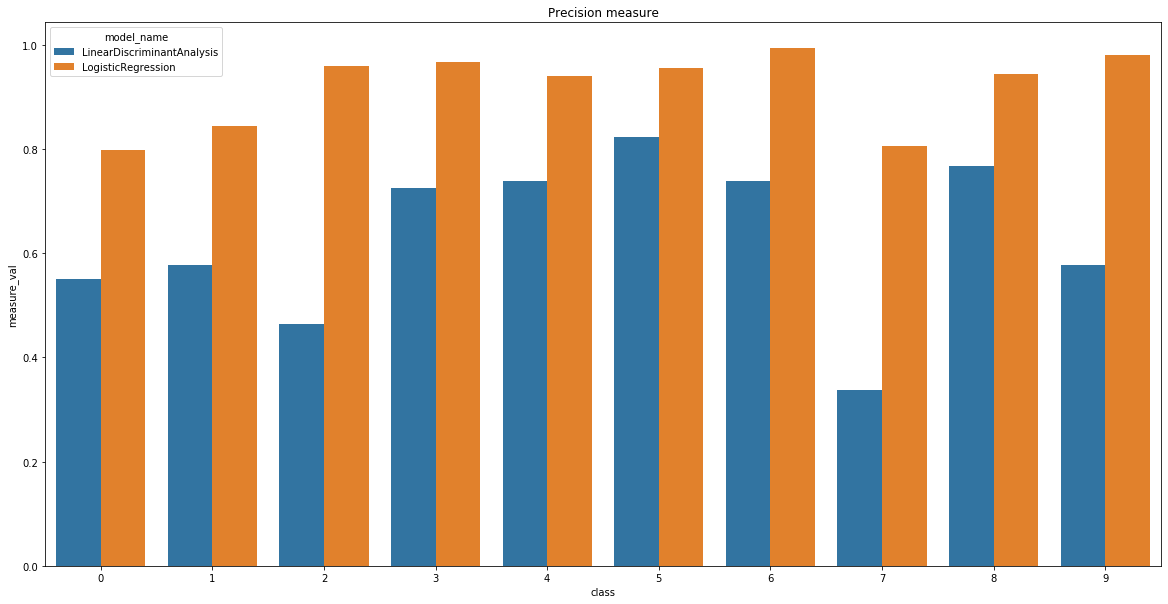

In [56]:
df = pd.DataFrame(np.array(linear_9000_stats_train_test))

df.columns = ["_","measure_name", "measure_val", "model_name", "class"]

df["measure_val"] = pd.to_numeric(df.measure_val, errors='coerce')

plt.figure(figsize=(20, 10))
ax = sns.barplot(x="class", y="measure_val", hue="model_name", data=df[df["measure_name"] == "precision"])
ax.set_title("Precision measure")

Text(0.5, 1.0, 'Recall measure')

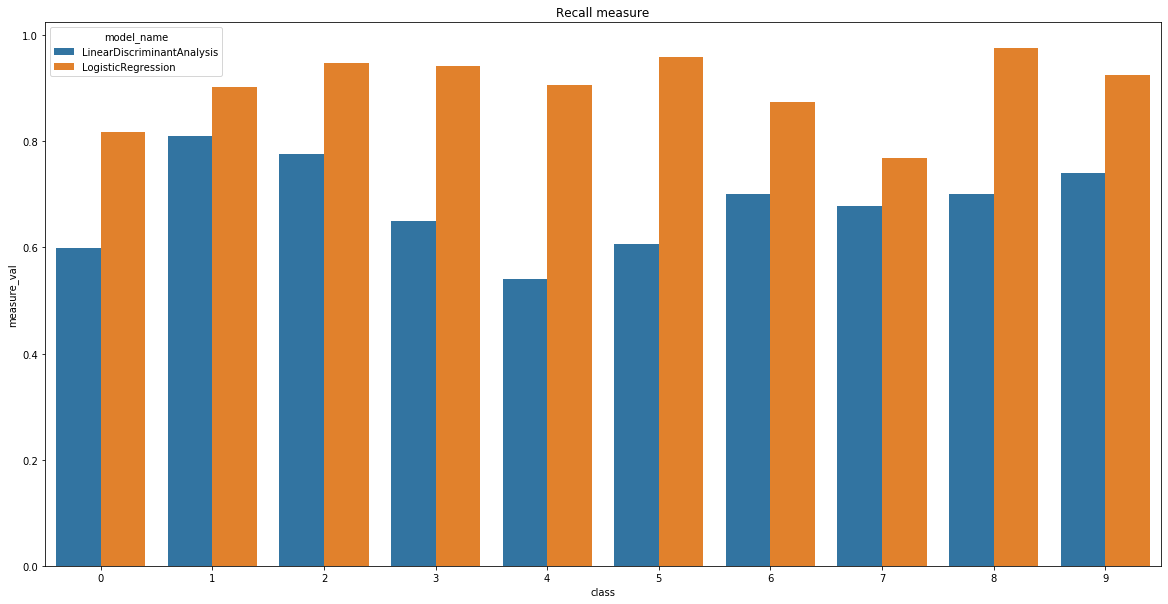

In [57]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="class", y="measure_val", hue="model_name", data=df[df["measure_name"] == "recall"])
ax.set_title("Recall measure")

Text(0.5, 1.0, 'F1 score measure')

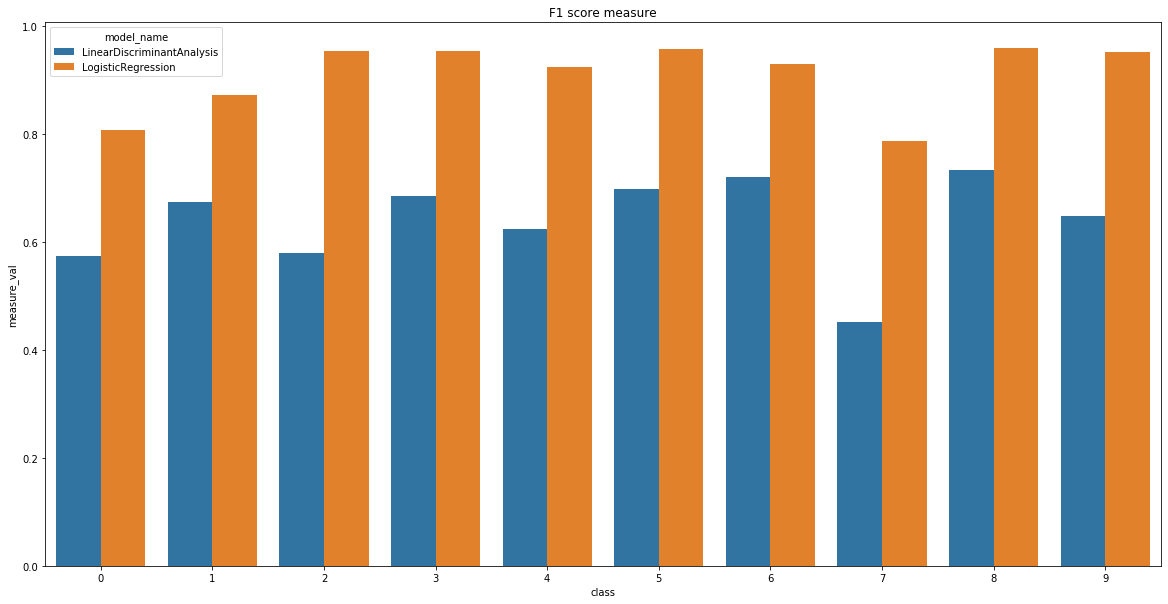

In [58]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="class", y="measure_val", hue="model_name", data=df[df["measure_name"] == "f1-score"])
ax.set_title("F1 score measure")

#### ROC Curve for every model using out-of-folds samples

Using the out-of-folds prediction we collected earlier, we will plot the ROC Curve.

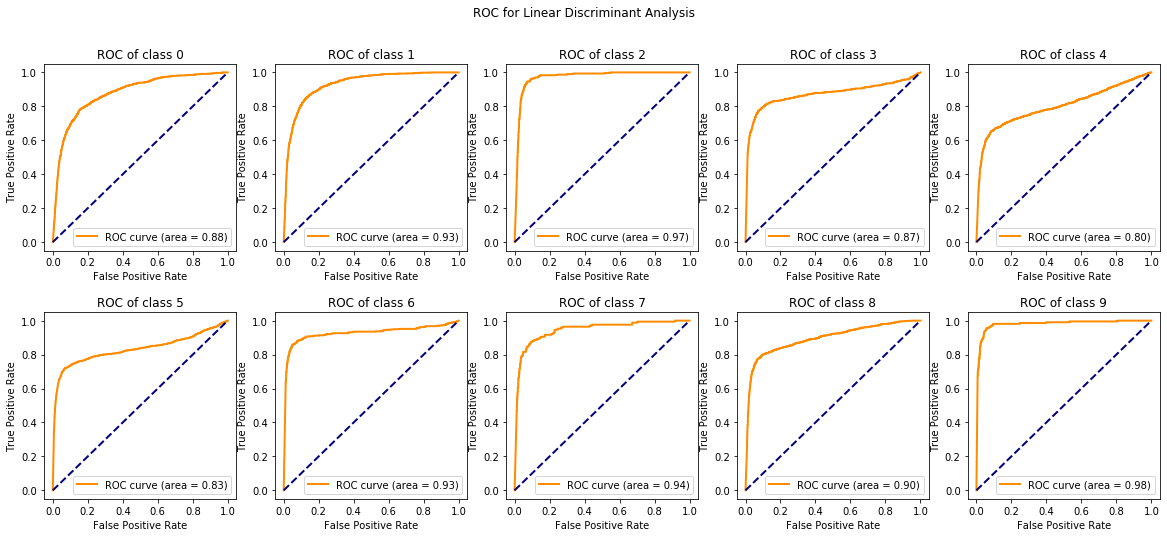

In [59]:
scores = np.array(linear_models_train_test_split_9k["LinearDiscriminantAnalysis"]["scores"])
y_bin = sklearn.preprocessing.label_binarize(y_test_linear_9000, classes=list(CLASSES.keys()))

fig, axs = plt.subplots(nrows=2, ncols=5)
fig.set_size_inches(20, 8)
fig.suptitle("ROC for Linear Discriminant Analysis")
fig.subplots_adjust(hspace=0.33)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(list(CLASSES.keys()))):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_bin[:, i], scores[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    plot_roc_curve(fpr[i], tpr[i], roc_auc[i], axs[int(i/5), i%5], i)

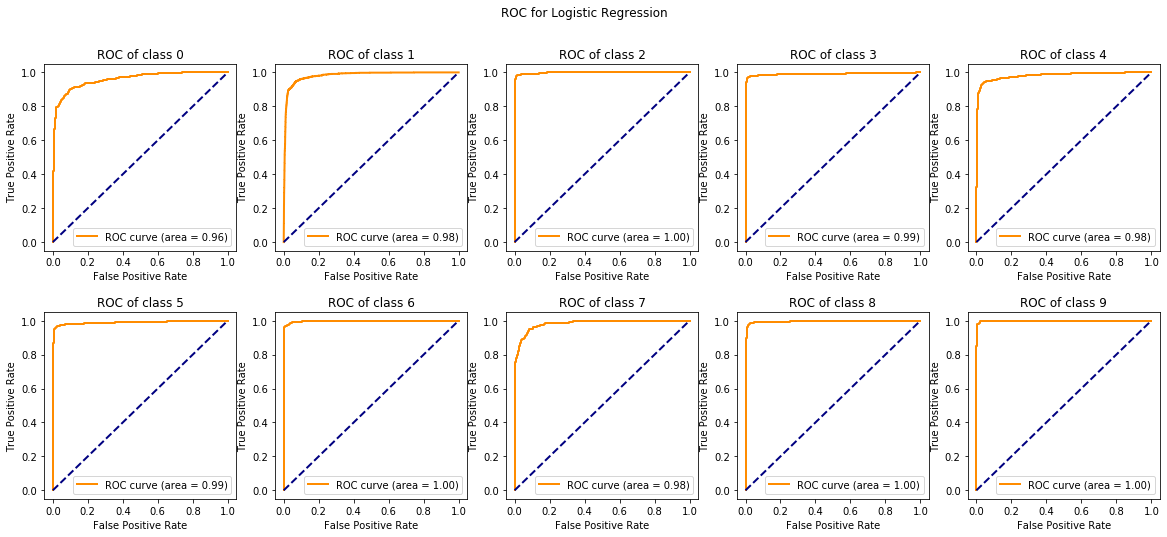

In [60]:
scores = np.array(linear_models_train_test_split_9k["LogisticRegression"]["scores"])
y_bin = sklearn.preprocessing.label_binarize(y_test_linear_9000, classes=list(CLASSES.keys()))

fig, axs = plt.subplots(nrows=2, ncols=5)
fig.set_size_inches(20, 8)
fig.suptitle("ROC for Logistic Regression")
fig.subplots_adjust(hspace=0.33)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(list(CLASSES.keys()))):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_bin[:, i], scores[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    plot_roc_curve(fpr[i], tpr[i], roc_auc[i], axs[int(i/5), i%5], i)


In [61]:
import dill
dill.dump_session('environnement_linear_1.db')